<h1> Survey Trend Processing <h1>

In this file I developed visualizations for survey data, which includes 7 graphs respectively show Hong Kong citizens' trust towards the Hong Kong government,average rating of Hong Kong Chief Executives, satisfaction with the democracy development in Hong Kong, average rating of Hong Kong as an egalitarian society, average rating of Hong Kong as an fair society, average rating of Hong Kong as an corruption free society, average rating of Hong Kong's public order, average rating of Hong Kong's rule of law. The first two graphs concern the topic of government and governance, while the next five concern the topic of democracy and justice.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<h3> Trust towards the Hong Kong Government <h3>

In [2]:
trust = pd.read_csv('datatables_trust_towards_the_government.csv')
trust

,調查開始日期Survey Start Date,調查結束日期Survey End Date,樣本數目Sample size,次樣本數目Subsample size,回應比率Response rate,好信任Very trust,幾信任Quite trust,一半半Half-half,幾唔信任Quite distrust,好唔信任Very distrust,唔知/難講DK/HS,合計Total,信任Trust,不信任Distrust,淨值Net Value,平均量值Mean value,基數Base,樣本平均標準誤差Standard Error of Mean,備註Remark
0,2024-01-02,2024-01-11,669,335,50.4%,23.8%,27.9%,12.4%,7.9%,27.1%,0.9%,100.0%,51.7%,35.0%,16.7%,3.1,331,0.1,$
1,2023-11-01,2023-11-15,"1,004",518,51.4%,23.3%,30.5%,10.8%,12.1%,20.6%,2.7%,100.0%,53.8%,32.7%,21.2%,3.2,504,0.1,NaN
2,2023-08-01,2023-08-10,"1,005",520,54.5%,16.5%,31.6%,13.4%,16.1%,21.7%,0.7%,100.0%,48.1%,37.8%,10.2%,3.1,516,0.1,NaN
3,2023-05-03,2023-05-18,"1,003",514,52.4%,23.2%,28.7%,13.6%,12.8%,19.6%,2.1%,100.0%,51.9%,32.4%,19.5%,3.2,503,0.1,NaN
4,2023-02-01,2023-02-09,"1,017",504,58.0%,21.0%,32.4%,15.2%,11.5%,17.5%,2.3%,100.0%,53.5%,29.0%,24.4%,3.3,474,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1993-04-06,1993-04-13,721,721,62.5%,10.2%,39.6%,13.8%,17.7%,5.9%,12.8%,100.0%,49.8%,23.6%,26.2%,2.9,629,0.1,NaN
350,1993-03-03,1993-03-04,577,577,64.5%,7.2%,52.4%,19.6%,12.5%,2.1%,6.3%,100.0%,59.6%,14.6%,45.0%,3.3,541,0.1,NaN
351,1993-02-03,1993-02-04,718,718,66.5%,6.4%,44.3%,15.7%,20.3%,4.7%,8.6%,100.0%,50.7%,25.0%,25.7%,3.0,656,0.1,NaN
352,1993-01-19,1993-01-20,699,699,61.0%,8.0%,44.7%,18.3%,19.7%,3.7%,5.5%,100.0%,52.7%,23.4%,29.3%,3.2,660,0.1,NaN


In [3]:
trust.columns = ['Survey Start Date', 'Survey End Date', 'Sample size',
              'Subsample size', 'Response rate', 'Very trust',
              'Quite trust', 'Half-half', 'Quite distrust',
              'Very distrust', 'DK/HS', 'Total', 'Trust', 'Distrust',
              'Net Value', 'Mean value', 'Base',
              'Standard Error of Mean', 'Remark']

trust['Survey Start Date'] = pd.to_datetime(trust['Survey Start Date'])
trust['Net Value'] = trust['Net Value'].str.rstrip('%').astype(float)
trust['Very trust'] = trust['Very trust'].str.rstrip('%').astype(float)
trust['Quite trust'] = trust['Quite trust'].str.rstrip('%').astype(float)
trust['Very distrust'] = trust['Very distrust'].str.rstrip('%').astype(float)
trust['Quite distrust'] = trust['Quite distrust'].str.rstrip('%').astype(float)

recent = trust[trust['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent = recent[['Survey Start Date', 'Net Value', 'Very trust', 'Quite trust', 'Very distrust', 'Quite distrust']]
recent['trust'] = recent['Quite trust'] + recent['Very trust']
recent['distrust'] = recent['Quite distrust'] + recent['Very distrust']
recent 

,Survey Start Date,Net Value,Very trust,Quite trust,Very distrust,Quite distrust,trust,distrust
0,2024-01-02,16.7,23.8,27.9,27.1,7.9,51.7,35.0
1,2023-11-01,21.2,23.3,30.5,20.6,12.1,53.8,32.7
2,2023-08-01,10.2,16.5,31.6,21.7,16.1,48.1,37.8
3,2023-05-03,19.5,23.2,28.7,19.6,12.8,51.9,32.4
4,2023-02-01,24.4,21.0,32.4,17.5,11.5,53.4,29.0
...,...,...,...,...,...,...,...,...
82,2017-03-06,8.5,10.3,33.2,17.5,17.5,43.5,35.0
83,2017-02-20,10.1,11.1,34.8,14.1,21.7,45.9,35.8
84,2017-02-06,2.6,8.3,34.0,20.7,19.0,42.3,39.7
85,2017-01-19,10.6,11.5,36.0,20.7,16.2,47.5,36.9


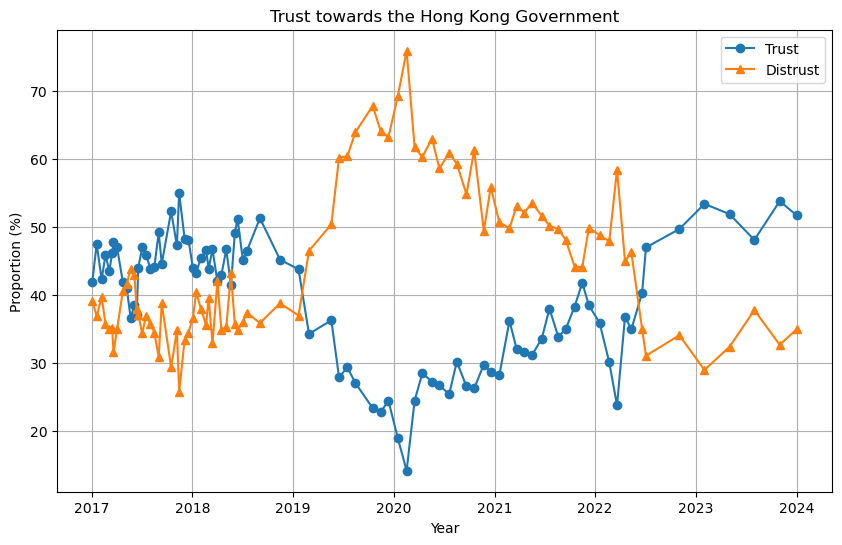

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['trust'], marker='o', linestyle='-', label='Trust')
plt.plot(recent['Survey Start Date'], recent['distrust'], marker='^', linestyle='-', label='Distrust')
plt.title('Trust towards the Hong Kong Government')
plt.xlabel('Year')
plt.ylabel('Proportion (%)')
plt.legend()
plt.grid(True)
plt.show()

<h3> Average rating of Hong Kong Chief Executives <h3>

In [5]:
governer = pd.read_csv('datatables_lin_li.csv')
governer

,任內第X個月Xth Month of Service,時間(彭定康)Time (Chris Patten),彭定康評分Chris Patten's Ratings,時間(董建華)Time (Tung Chee-hwa),董建華評分Tung Chee-hwa's Ratings,時間(曾蔭權)Time (Donald Tsang),曾蔭權評分Donald Tsang's Ratings,時間(梁振英)Time (Leung Chun-ying),梁振英評分Leung Chun-ying's Ratings,時間(林鄭月娥)Time (Carrie Lam's Rating),林鄭月娥評分Carrie Lam's Ratings,時間(李家超)Time (John Lee's Rating),李家超評分John Lee's Ratings
0,1,4/1992,53.3,7/1997,64.5,6/2005,72.3,7/2012,52.5,7/2017,61.0,7/2022,53.8
1,2,5/1992,56.1,8/1997,65.7,7/2005,70.2,8/2012,50.3,8/2017,59.6,8/2022,54.9
2,3,6/1992,58.2,9/1997,67.7,8/2005,66.1,9/2012,46.3,9/2017,58.6,9/2022,53.5
3,4,7/1992,60.7,10/1997,64.9,9/2005,68.1,10/2012,49.2,10/2017,60.9,10/2022,54.2
4,5,8/1992,63.1,11/1997,63.4,10/2005,67.9,11/2012,52.6,11/2017,60.9,11/2022,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,NaN,NaN,11/2004,49.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,90,NaN,NaN,12/2004,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,91,NaN,NaN,1/2005,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,92,NaN,NaN,2/2005,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
governer.columns = ['Xth Month of Service', 'Time (Chris Patten)', '''Chris Patten's Ratings''',
                    'Time (Tung Chee-hwa)', '''Tung Chee-hwa's Ratings''',
                    'Time (Donald Tsang)', '''Donald Tsang's Ratings''',
                    'Time (CY Leung)', '''CY Leung's Ratings''',
                    'Time (Carrie Lam)', '''Carrie Lam's Ratings''',
                    'Time (John Lee)', '''John Lee's Ratings''']
carrie_lam = governer[['Time (Carrie Lam)', '''Carrie Lam's Ratings''' ]]
carrie_lam['Time (Carrie Lam)'] = pd.to_datetime(carrie_lam['Time (Carrie Lam)'])
carrie_lam = carrie_lam.dropna()
john_lee = governer[['Time (John Lee)', '''John Lee's Ratings''']]
john_lee['Time (John Lee)'] = pd.to_datetime(john_lee['Time (John Lee)'])
john_lee = john_lee.dropna()

/var/folders/g0/b242sqmd0x397rx3gm8rmsjm0000gn/T/ipykernel_80254/3498457616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrie_lam['Time (Carrie Lam)'] = pd.to_datetime(carrie_lam['Time (Carrie Lam)'])
/var/folders/g0/b242sqmd0x397rx3gm8rmsjm0000gn/T/ipykernel_80254/3498457616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  john_lee['Time (John Lee)'] = pd.to_datetime(john_lee['Time (John Lee)'])


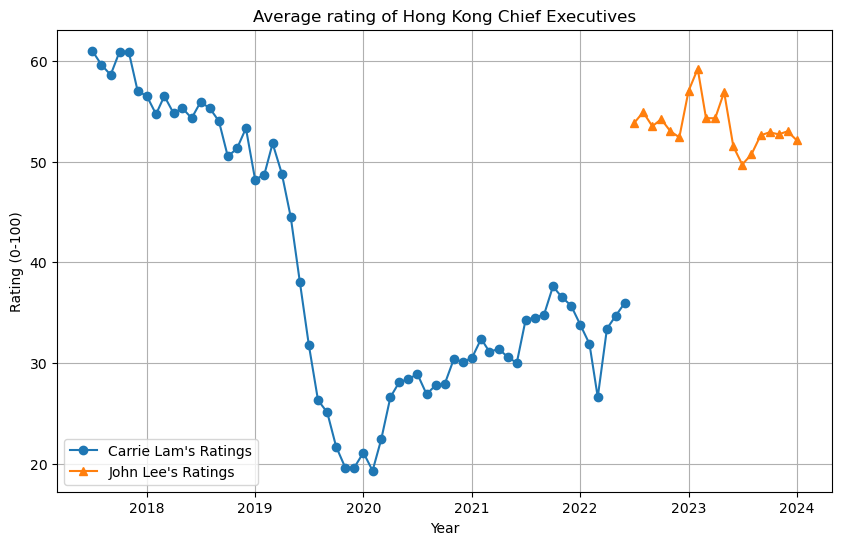

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(carrie_lam['Time (Carrie Lam)'], carrie_lam['''Carrie Lam's Ratings'''], marker='o', linestyle='-', label='''Carrie Lam's Ratings''')
plt.plot(john_lee['Time (John Lee)'], john_lee['''John Lee's Ratings'''], marker='^', linestyle='-', label='''John Lee's Ratings''')
plt.title("Average rating of Hong Kong Chief Executives")
plt.xlabel('Year')
plt.ylabel('Rating (0-100)') 
plt.legend()
plt.grid(True)
plt.show()

<h3> Satisfaction with the democracy development in Hong Kong <h3>

In [8]:
democracy = pd.read_csv('datatables_democracy.csv')
democracy

,調查開始日期Survey Start Date,調查結束日期Survey End Date,成功樣本Successful cases,次樣本人數Subsample,回應率Response rate,好滿意Very satisfied,幾滿意Quite satisfied,滿意Satisfied,一半半Half-half,幾唔滿意Quite dissatisfied,好唔滿意Very dissatisfied,唔滿意Dissatisfied,唔知/難講DK/HS,總數Total,淨值Netvalue,平均量值Mean value,基數Base,樣本平均標準誤差Standard Error of Mean,備注Remark
0,2023-12-01,2023-12-07,502,502,48.7%,9.8%,31.0%,40.9%,11.5%,9.9%,30.7%,40.6%,7.0%,100.0%,0.2%,2.8,462,0.1,NaN
1,2023-04-04,2023-04-12,"1,005",515,59.4%,10.1%,21.7%,31.8%,15.1%,14.0%,31.4%,45.5%,7.5%,100.0%,-13.6%,2.6,467,0.1,NaN
2,2022-10-10,2022-10-19,"1,093",511,61.5%,8.6%,22.6%,31.1%,22.5%,12.5%,24.7%,37.3%,9.1%,100.0%,-6.1%,2.8,455,0.1,NaN
3,2022-04-19,2022-04-22,"1,001",600,47.6%,6.8%,16.9%,23.7%,14.3%,15.0%,34.8%,49.8%,12.2%,100.0%,-26.1%,2.4,515,0.1,NaN
4,2021-11-15,2021-11-18,"1,004",596,53.7%,7.5%,18.3%,25.8%,11.0%,13.8%,41.5%,55.3%,8.0%,100.0%,-29.5%,2.3,543,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1997-11-11,1997-11-11,518,518,47.6%,0.8%,22.9%,23.7%,29.0%,33.0%,5.4%,38.4%,8.8%,100.0%,-14.7%,2.8,472,0.1,NaN
117,1997-10-28,1997-10-29,536,536,44.5%,0.4%,22.5%,22.9%,29.1%,33.6%,5.1%,38.7%,9.4%,100.0%,-15.8%,2.8,483,0.1,NaN
118,1997-09-23,1997-09-24,512,512,41.6%,0.6%,24.0%,24.6%,22.5%,33.9%,4.3%,38.2%,14.7%,100.0%,-13.6%,2.8,436,0.1,NaN
119,1997-08-26,1997-08-27,532,532,42.4%,0.4%,21.7%,22.1%,22.3%,31.3%,5.4%,36.7%,18.9%,100.0%,-14.6%,2.8,430,0.1,NaN


In [9]:
democracy.columns = ['Survey Start Date', 'Survey End Date',
                     'Successful cases', 'Subsample', 'Response rate',
                     'Very satisfied', 'Quite satisfied', 'Satisfied',
                     'Half-half', 'Quite dissatisfied', 'Very dissatisfied',
                     'Dissatisfied', 'DK/HS', 'Total', 'Netvalue',
                     'Mean value', 'Base', 'Standard Error of Mean',
                     'Remark']
democracy['Survey Start Date'] = pd.to_datetime(democracy['Survey Start Date'])
democracy['Net Value'] = democracy['Netvalue'].str.rstrip('%').astype(float)
democracy['Very satisfied'] = democracy['Very satisfied'].str.rstrip('%').astype(float)
democracy['Quite satisfied'] = democracy['Quite satisfied'].str.rstrip('%').astype(float)
democracy['Very dissatisfied'] = democracy['Very dissatisfied'].str.rstrip('%').astype(float)
democracy['Quite dissatisfied'] = democracy['Quite dissatisfied'].str.rstrip('%').astype(float)

recent = democracy[democracy['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent['trust'] = recent['Quite satisfied'] + recent['Very satisfied']
recent['distrust'] = recent['Quite dissatisfied'] + recent['Very dissatisfied']
recent

/var/folders/g0/b242sqmd0x397rx3gm8rmsjm0000gn/T/ipykernel_80254/3820498220.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['trust'] = recent['Quite satisfied'] + recent['Very satisfied']
/var/folders/g0/b242sqmd0x397rx3gm8rmsjm0000gn/T/ipykernel_80254/3820498220.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['distrust'] = recent['Quite dissatisfied'] + recent['Very dissatisfied']


,Survey Start Date,Survey End Date,Successful cases,Subsample,Response rate,Very satisfied,Quite satisfied,Satisfied,Half-half,Quite dissatisfied,...,DK/HS,Total,Netvalue,Mean value,Base,Standard Error of Mean,Remark,Net Value,trust,distrust
0,2023-12-01,2023-12-07,502,502,48.7%,9.8,31.0,40.9%,11.5%,9.9,...,7.0%,100.0%,0.2%,2.8,462,0.1,NaN,0.2,40.8,40.6
1,2023-04-04,2023-04-12,"1,005",515,59.4%,10.1,21.7,31.8%,15.1%,14.0,...,7.5%,100.0%,-13.6%,2.6,467,0.1,NaN,-13.6,31.8,45.4
2,2022-10-10,2022-10-19,"1,093",511,61.5%,8.6,22.6,31.1%,22.5%,12.5,...,9.1%,100.0%,-6.1%,2.8,455,0.1,NaN,-6.1,31.2,37.2
3,2022-04-19,2022-04-22,"1,001",600,47.6%,6.8,16.9,23.7%,14.3%,15.0,...,12.2%,100.0%,-26.1%,2.4,515,0.1,NaN,-26.1,23.7,49.8
4,2021-11-15,2021-11-18,"1,004",596,53.7%,7.5,18.3,25.8%,11.0%,13.8,...,8.0%,100.0%,-29.5%,2.3,543,0.1,NaN,-29.5,25.8,55.3
5,2021-04-19,2021-04-22,"1,004",627,54.5%,6.9,13.7,20.5%,11.6%,13.5,...,9.3%,100.0%,-38.0%,2.2,567,0.1,NaN,-38.0,20.6,58.6
6,2020-11-23,2020-11-26,"1,085",527,74.6%,7.0,13.5,20.5%,11.8%,11.5,...,7.8%,100.0%,-39.3%,2.1,480,0.1,NaN,-39.3,20.5,59.8
7,2020-04-14,2020-04-17,"1,005",567,64.5%,6.1,14.5,20.5%,10.7%,12.8,...,4.8%,100.0%,-43.4%,2.1,535,0.1,NaN,-43.4,20.6,64.0
8,2019-10-24,2019-10-28,519,519,68.3%,5.2,10.0,15.2%,7.4%,14.7,...,7.7%,100.0%,-54.6%,1.9,477,0.1,NaN,-54.6,15.2,69.7
9,2018-12-17,2018-12-20,"1,000",512,60.6%,5.3,28.6,33.9%,12.8%,21.4,...,3.5%,100.0%,-15.9%,2.6,488,0.1,@,-15.9,33.9,49.8


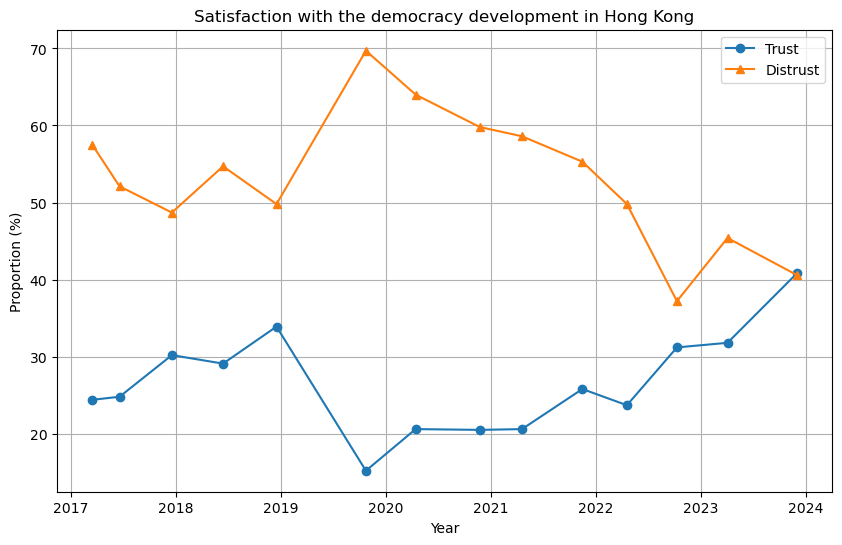

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['trust'], marker='o', linestyle='-', label='Trust')
plt.plot(recent['Survey Start Date'], recent['distrust'], marker='^', linestyle='-', label='Distrust')
plt.title("Satisfaction with the democracy development in Hong Kong")
plt.xlabel('Year')
plt.ylabel('Proportion (%)')
plt.legend()
plt.grid(True)
plt.show()

<h3> Average rating of Hong Kong as an egalitarian society <h3>

In [11]:
egalitarian = pd.read_csv('datatables_egalitarian.csv')
egalitarian

,調查開始日期Survey Start Date,調查結束日期Survey End Date,樣本人數Total Sample,次樣本人數Sub Sample,回應率Response Rate,平等Equality,標準誤差Standard Error,評分人數Number of Raters,認知率Recognition Rate,備註Remark
0,2023-08-01,2023-08-10,"1,005",515,54.5%,5.20,0.11,508,98.6%,NaN
1,2023-02-01,2023-02-09,"1,017",510,58.0%,5.72,0.11,493,96.6%,NaN
2,2022-08-01,2022-08-09,"1,004",494,58.6%,5.34,0.11,478,96.7%,NaN
3,2022-02-07,2022-02-10,"1,012",549,58.1%,4.31,0.11,538,98.0%,NaN
4,2021-08-09,2021-08-12,"1,002",645,49.4%,4.39,0.11,630,97.8%,NaN
...,...,...,...,...,...,...,...,...,...,...
72,1998-03-02,1998-03-02,527,527,46.1%,6.32,0.07,500,94.9%,NaN
73,1998-01-06,1998-01-06,520,520,47.9%,6.31,0.07,497,95.6%,NaN
74,1997-11-04,1997-11-05,523,523,47.3%,6.24,0.07,488,93.3%,NaN
75,1997-07-29,1997-07-30,564,564,39.7%,6.30,0.07,542,96.1%,NaN


In [12]:
egalitarian.columns = ['Survey Start Date', 'Survey End Date', 'Total Sample',
                     'Sub Sample', 'Response rate', 'Equality', 'Standard Error of Mean', 
                     'Number of Raters', 'Recognition Rate', 'Remark']
egalitarian['Survey Start Date'] = pd.to_datetime(egalitarian['Survey Start Date'])
recent = egalitarian[egalitarian['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent = recent[['Survey Start Date', 'Equality']]
recent = recent.sort_values(by='Survey Start Date')
recent

,Survey Start Date,Equality
13,2017-02-06,6.09
12,2017-07-10,6.33
11,2018-01-15,5.87
10,2018-05-04,5.82
9,2019-05-06,5.69
8,2019-09-16,4.71
7,2020-04-14,4.87
6,2020-07-06,4.62
5,2021-02-02,5.08
4,2021-08-09,4.39


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


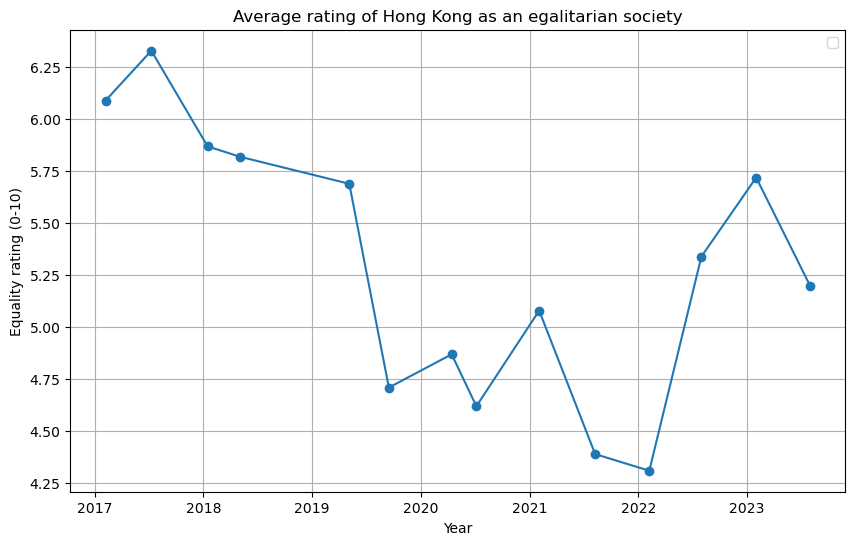

In [13]:

plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['Equality'], marker='o', linestyle='-')
plt.title('Average rating of Hong Kong as an egalitarian society')
plt.xlabel('Year')
plt.ylabel('Equality rating (0-10)')
plt.legend()
plt.grid(True)
plt.show()


<h3> Average rating of Hong Kong as an fair society <h3>

In [3]:
fairness = pd.read_csv('datatables_fairness.csv')
fairness

,調查開始日期Survey Start Date,調查結束日期Survey End Date,樣本人數Total Sample,次樣本人數Sub Sample,回應率Response Rate,公平Fairness,標準誤差Standard Error,評分人數Number of Raters,認知率Recognition Rate,備註Remark
0,2023-08-01,2023-08-10,"1,005",523,54.5%,4.93,0.11,515,98.6%,NaN
1,2023-02-01,2023-02-09,"1,017",506,58.0%,5.40,0.11,495,97.8%,NaN
2,2022-08-01,2022-08-09,"1,004",495,58.6%,5.05,0.12,488,98.5%,NaN
3,2022-02-07,2022-02-10,"1,012",550,58.1%,4.31,0.11,545,99.1%,NaN
4,2021-08-09,2021-08-12,"1,002",642,49.4%,4.32,0.11,628,97.8%,NaN
...,...,...,...,...,...,...,...,...,...,...
71,1998-03-02,1998-03-02,527,527,46.1%,6.06,0.07,507,96.2%,NaN
72,1998-01-06,1998-01-06,520,520,47.9%,6.06,0.08,503,96.7%,NaN
73,1997-11-04,1997-11-05,523,523,47.3%,5.93,0.07,491,93.9%,NaN
74,1997-07-29,1997-07-30,564,564,39.7%,6.22,0.07,528,93.6%,NaN


In [4]:
fairness.columns = ['Survey Start Date', 'Survey End Date', 'Total Sample',
              'Sub Sample', 'Response rate', 'Equality', 'Standard Error of Mean', 
              'Number of Raters', 'Recognition Rate', 'Remark']
fairness['Survey Start Date'] = pd.to_datetime(fairness['Survey Start Date'])
recent = fairness[fairness['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent = recent[['Survey Start Date', 'Equality']]
recent = recent.sort_values(by='Survey Start Date')
recent

,Survey Start Date,Equality
13,2017-02-06,5.66
12,2017-07-10,5.96
11,2018-01-15,5.47
10,2018-05-04,5.77
9,2019-05-06,5.47
8,2019-09-16,4.20
7,2020-04-14,4.58
6,2020-07-06,4.15
5,2021-02-02,4.23
4,2021-08-09,4.32


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


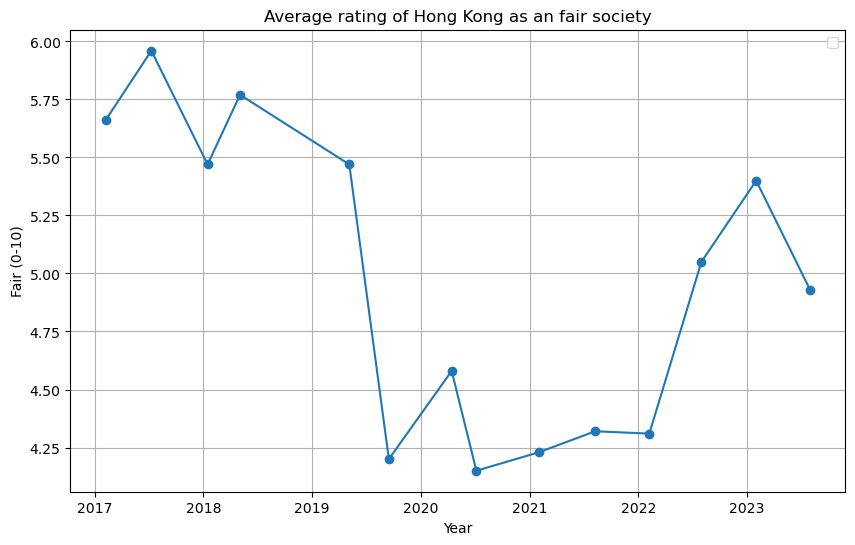

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['Equality'], marker='o', linestyle='-')
plt.title('Average rating of Hong Kong as an fair society')
plt.xlabel('Year')
plt.ylabel('Fair (0-10)')
plt.legend()
plt.grid(True)
plt.show()

<h3> Average rating of Hong Kong as an corruption free society <h3>

In [17]:
corruption_free = pd.read_csv('datatables_corruption_free.csv')
corruption_free

,調查開始日期Survey Start Date,調查結束日期Survey End Date,樣本人數Total Sample,次樣本人數Sub Sample,回應率Response Rate,廉潔Corruption free Practices,標準誤差Standard Error,評分人數Number of Raters,認知率Recognition Rate,備註Remark
0,2023-08-01,2023-08-10,"1,005",515,54.5%,5.71,0.11,496,96.4%,NaN
1,2023-02-01,2023-02-09,"1,017",532,58.0%,6.29,0.11,507,95.4%,NaN
2,2022-08-01,2022-08-09,"1,004",526,58.6%,5.86,0.11,501,95.3%,NaN
3,2022-02-07,2022-02-10,"1,012",549,58.1%,5.25,0.12,531,96.7%,NaN
4,2021-08-09,2021-08-12,"1,002",643,49.4%,5.04,0.12,621,96.5%,NaN
...,...,...,...,...,...,...,...,...,...,...
72,1998-03-02,1998-03-02,527,527,46.1%,6.73,0.07,495,93.9%,NaN
73,1998-01-06,1998-01-06,520,520,47.9%,6.70,0.07,467,89.8%,NaN
74,1997-11-04,1997-11-05,523,523,47.3%,6.74,0.07,473,90.4%,NaN
75,1997-07-29,1997-07-30,564,564,39.7%,6.86,0.07,529,93.8%,NaN


In [18]:
corruption_free.columns = ['Survey Start Date', 'Survey End Date', 'Total Sample',
                     'Sub Sample', 'Response rate', 'Corruption free Practices', 'Standard Error of Mean', 
                     'Number of Raters', 'Recognition Rate', 'Remark']
corruption_free['Survey Start Date'] = pd.to_datetime(corruption_free['Survey Start Date'])
recent = corruption_free[corruption_free['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent = recent[['Survey Start Date', 'Corruption free Practices']]
recent = recent.sort_values(by='Survey Start Date')
recent

,Survey Start Date,Corruption free Practices
13,2017-02-06,6.17
12,2017-07-10,6.74
11,2018-01-15,6.30
10,2018-05-04,6.59
9,2019-05-06,6.43
8,2019-09-16,5.12
7,2020-04-14,4.98
6,2020-07-06,4.98
5,2021-02-02,5.00
4,2021-08-09,5.04


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


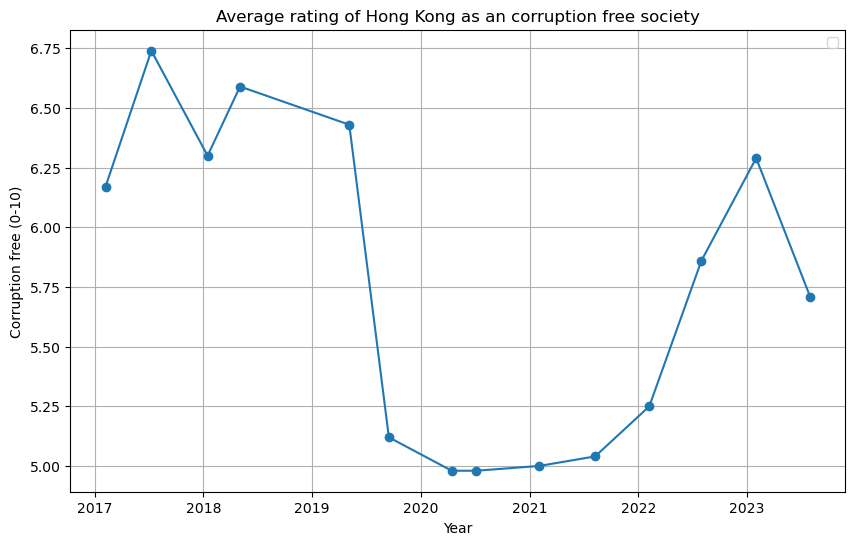

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['Corruption free Practices'], marker='o', linestyle='-')
plt.title('Average rating of Hong Kong as an corruption free society')
plt.xlabel('Year')
plt.ylabel('Corruption free (0-10)')
plt.legend()
plt.grid(True)
plt.show()

<h3> Average rating of Hong Kong's public order <h3>

In [20]:
public_order = pd.read_csv('datatables_public_order.csv')
public_order

,調查開始日期Survey Start Date,調查結束日期Survey End Date,樣本人數Total Sample,次樣本人數Sub Sample,回應率Response Rate,治安Public Order,標準誤差Standard Error,評分人數Number of Raters,認知率Recognition Rate,備註Remark
0,2023-08-01,2023-08-10,"1,005",508,54.5%,5.57,0.11,507,99.8%,NaN
1,2023-02-01,2023-02-09,"1,017",520,58.0%,6.61,0.11,519,99.7%,NaN
2,2022-08-01,2022-08-09,"1,004",526,58.6%,6.55,0.10,523,99.4%,NaN
3,2022-02-07,2022-02-10,"1,012",560,58.1%,6.10,0.10,556,99.2%,NaN
4,2021-08-09,2021-08-12,"1,002",634,49.4%,5.99,0.11,630,99.2%,NaN
...,...,...,...,...,...,...,...,...,...,...
70,1998-07-07,1998-07-07,532,532,48.1%,6.81,0.06,520,97.7%,NaN
71,1998-03-02,1998-03-02,527,527,46.1%,6.65,0.06,512,97.2%,NaN
72,1998-01-06,1998-01-06,520,520,47.9%,6.65,0.06,506,97.3%,NaN
73,1997-11-04,1997-11-05,523,523,47.3%,6.39,0.07,507,96.9%,NaN


In [21]:
public_order.columns = ['Survey Start Date', 'Survey End Date', 'Total Sample',
                     'Sub Sample', 'Response rate', 'Public Order', 'Standard Error of Mean', 
                     'Number of Raters', 'Recognition Rate', 'Remark']
public_order['Survey Start Date'] = pd.to_datetime(public_order['Survey Start Date'])
recent = public_order[public_order['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent = recent[['Survey Start Date', 'Public Order']]
recent = recent.sort_values(by='Survey Start Date')
recent

,Survey Start Date,Public Order
13,2017-02-06,7.16
12,2017-07-10,7.48
11,2018-01-15,7.52
10,2018-05-04,7.47
9,2019-05-06,7.02
8,2019-09-16,4.55
7,2020-04-14,5.13
6,2020-07-06,5.14
5,2021-02-02,5.70
4,2021-08-09,5.99


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


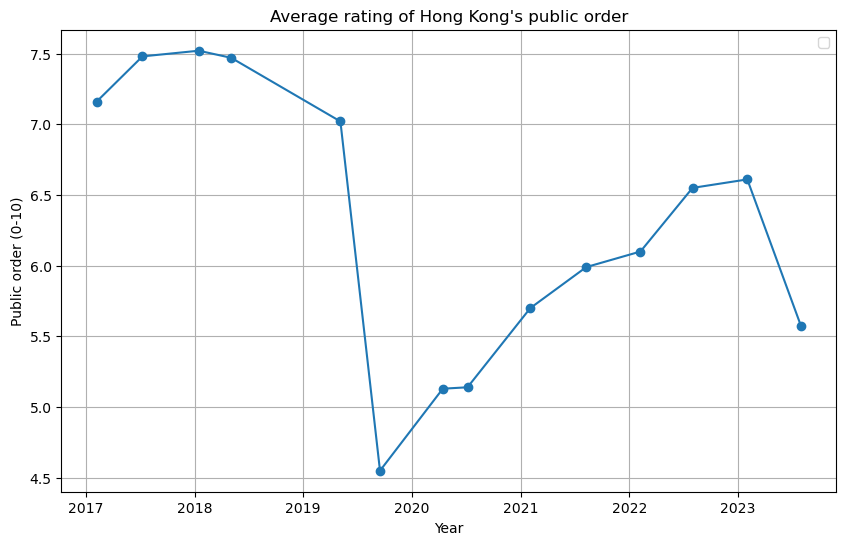

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['Public Order'], marker='o', linestyle='-')
plt.title('''Average rating of Hong Kong's public order''')
plt.xlabel('Year')
plt.ylabel('Public order (0-10)')
plt.legend()
plt.grid(True)
plt.show()

<h3> Average rating of Hong Kong's rule of law <h3>

In [23]:
rule_of_law = pd.read_csv('datatables_rule_of_law.csv')
rule_of_law

,調查開始日期Survey Start Date,調查結束日期Survey End Date,樣本人數Total Sample,次樣本人數Sub Sample,回應率Response Rate,法治程度The Rule of Law,標準誤差Standard Error,評分人數Number of Raters,認知率Recognition Rate,備註Remark
0,2023-08-01,2023-08-10,"1,005",522,54.5%,5.58,0.12,512,98.0%,NaN
1,2023-05-03,2023-05-18,"1,003",499,52.4%,5.53,0.13,488,97.9%,NaN
2,2023-02-01,2023-02-09,"1,017",518,58.0%,6.14,0.13,495,95.5%,NaN
3,2022-11-02,2022-11-10,"1,001",515,48.9%,5.20,0.13,503,97.7%,NaN
4,2022-08-01,2022-08-09,"1,004",505,58.6%,5.74,0.13,487,96.3%,NaN
...,...,...,...,...,...,...,...,...,...,...
98,1997-10-28,1997-10-29,536,536,44.5%,6.90,0.06,514,95.9%,NaN
99,1997-09-23,1997-09-24,511,511,41.6%,7.15,0.07,493,96.5%,NaN
100,1997-08-26,1997-08-27,532,532,42.4%,7.15,0.07,495,93.0%,NaN
101,1997-07-29,1997-07-30,564,564,39.7%,6.95,0.07,513,91.0%,NaN


In [24]:
rule_of_law.columns = ['Survey Start Date', 'Survey End Date', 'Total Sample',
       'Sub Sample', 'Response rate', 'The Rule of Law', 'Standard Error of Mean', 
       'Number of Raters', 'Recognition Rate', 'Remark']
rule_of_law['Survey Start Date'] = pd.to_datetime(rule_of_law['Survey Start Date'])
recent = rule_of_law[rule_of_law['Survey Start Date'] >= pd.to_datetime('2017-01-01')]
recent = recent[['Survey Start Date', 'The Rule of Law']]
recent = recent.sort_values(by='Survey Start Date')
recent

,Survey Start Date,The Rule of Law
36,2017-02-06,6.63
35,2017-07-10,6.98
34,2018-01-15,6.29
33,2018-05-04,6.74
32,2018-10-22,6.21
31,2019-05-06,6.20
30,2019-09-16,4.41
29,2020-04-14,4.51
28,2020-07-06,4.14
27,2020-08-03,3.80


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


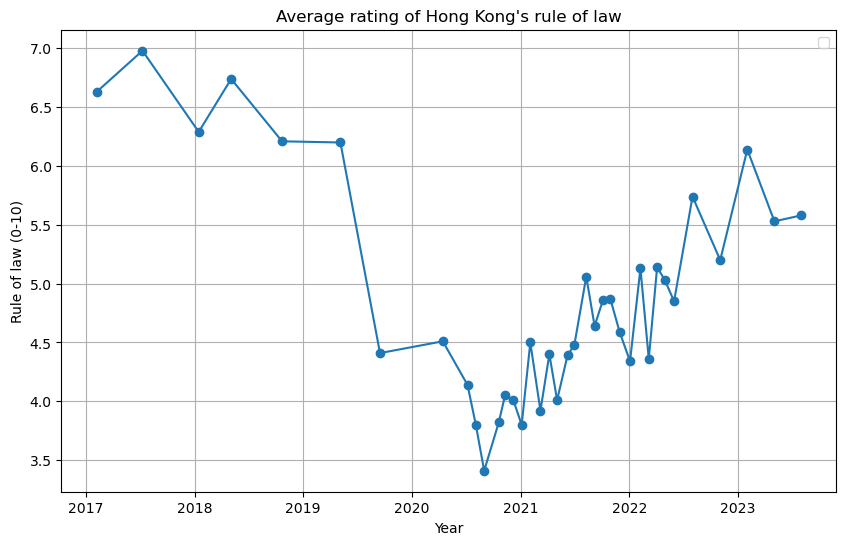

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(recent['Survey Start Date'], recent['The Rule of Law'], marker='o', linestyle='-')
plt.title('''Average rating of Hong Kong's rule of law''')
plt.xlabel('Year')
plt.ylabel('Rule of law (0-10)')
plt.legend()
plt.grid(True)
plt.show()